<a href="https://colab.research.google.com/github/mirzaie-mehdi/Data_Science/blob/main/machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pylab as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
plt.style.use('seaborn')

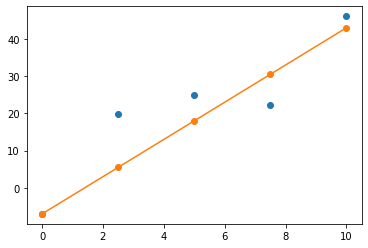

In [ ]:
from matplotlib import markers
n = 5
x = np.linspace(0,10, n)
y = 5*x + 10*np.random.normal(size = n)
plt.plot(x, y, 'o')
y_pred = 5*x + y[0]
plt.plot(x,y_pred, marker = 'o')
plt.show()

In [ ]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y )

LinearRegression()

In [ ]:
a = model.coef_

In [ ]:
b = model.intercept_

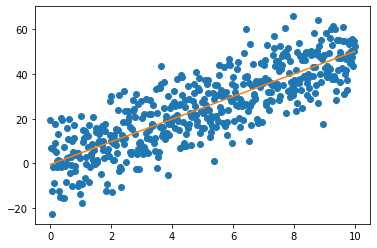

In [ ]:
y_pred = a*x + b
plt.plot(x, y, 'o')
plt.plot(x,y_pred)

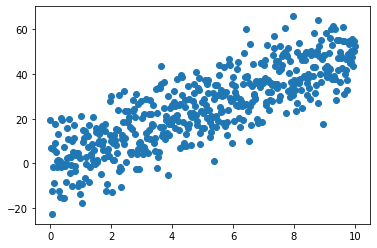

In [ ]:
n = 500
x = np.linspace(0,10, n)
y = 5*x + 10*np.random.normal(size = n)
plt.plot(x, y, 'o')

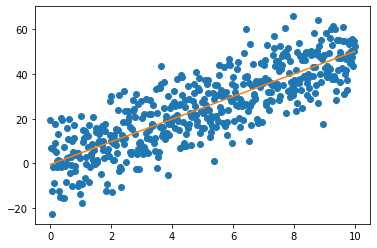

In [ ]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y )
a = model.coef_
b = model.intercept_
y_pred = a*x + b
plt.plot(x, y, 'o')
plt.plot(x,y_pred)

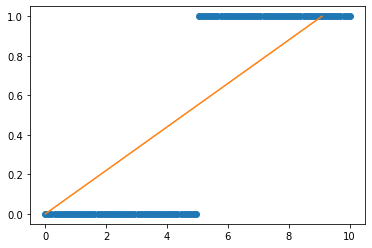

In [ ]:
n = 100
x = np.linspace(0, 10, n)
y = np.array([0]*int(n/2) + [1]*int(n/2))
y
plt.plot(x, y, 'o')
plt.plot(x[[0,90]], y[[0, 90]])

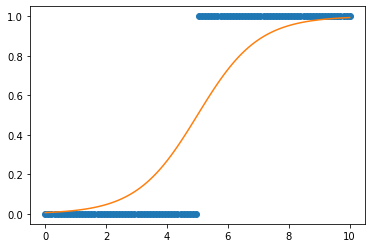

In [ ]:
theta1 = 1
theta0 = 5
z = theta1*(x - theta0)
ypred = 1/(1+np.exp(-z))
plt.plot(x, y, 'o')
plt.plot(x, ypred)

In [ ]:
from sklearn.linear_model import LogisticRegression

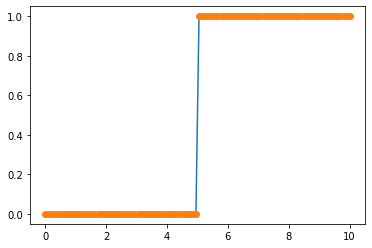

In [ ]:
model = LogisticRegression()
model.fit(x.reshape(-1, 1), y)
y_pred1 = model.predict(x.reshape(-1, 1))
plt.plot(x, y_pred1)
plt.plot(x, y, 'o')

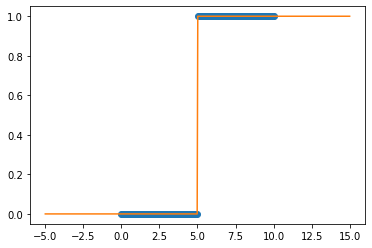

In [ ]:
x_test = np.linspace(-5, 15, 500)
ypred2 = model.predict(x_test.reshape(-1,1))
plt.plot(x,y, 'o')
plt.plot(x_test, ypred2)

In [13]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [14]:
%cd /content/drive/MyDrive/SciSchool/week1

/content/drive/MyDrive/SciSchool/week1


In [15]:
!kaggle datasets download -d ishaanthareja007/company-sales -p data

  0% 0.00/1.82k [00:00<?, ?B/s]
100% 1.82k/1.82k [00:00<00:00, 332kB/s]


In [16]:
! ls data

company-sales.zip


In [17]:
!unzip data/company-sales.zip -d data


Archive:  data/company-sales.zip
  inflating: data/company.csv        


In [20]:
df  = pd.read_csv('data/company.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Figure size 720x432 with 0 Axes>

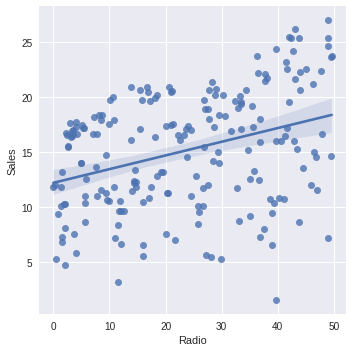

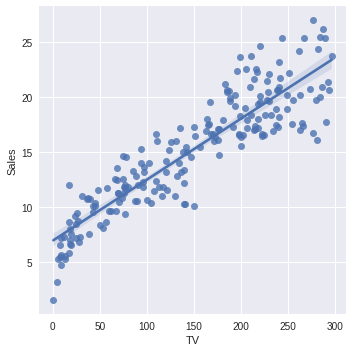

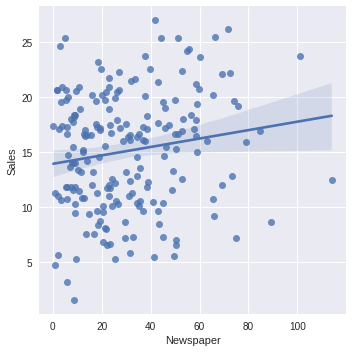

In [22]:
plt.figure(figsize = (10,6))
sns.lmplot(x= 'Radio', y = 'Sales', data =df)
sns.lmplot(x= 'TV', y = 'Sales', data =df)
sns.lmplot(x= 'Newspaper', y = 'Sales', data =df)

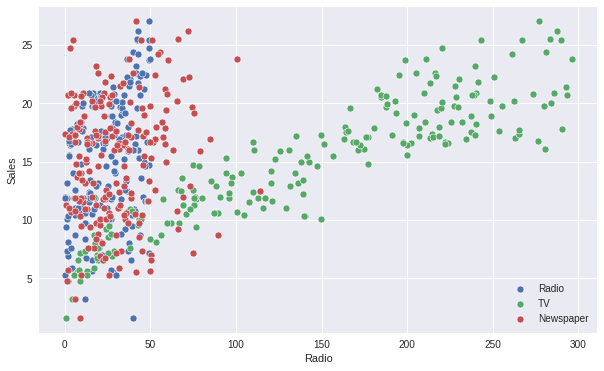

In [23]:
plt.figure(figsize = (10,6))
sns.scatterplot(x= 'Radio', y = 'Sales', data =df,label = 'Radio')
sns.scatterplot(x= 'TV', y = 'Sales', data =df,label = 'TV')
sns.scatterplot(x= 'Newspaper', y = 'Sales', data =df,label = 'Newspaper')




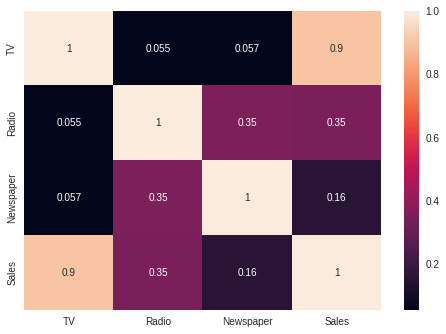

In [25]:
sns.heatmap(df.corr(), annot = True)

In [26]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [27]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [28]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [33]:
coeff_df = pd.DataFrame(model.coef_,x.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
TV,0.054446
Radio,0.107001
Newspaper,0.000336


In [36]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.20, random_state= 42)


In [43]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [44]:
predictions = model.predict(x_test)

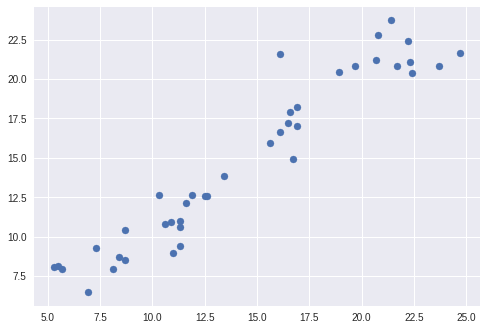

In [45]:
plt.scatter(y_test, predictions)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


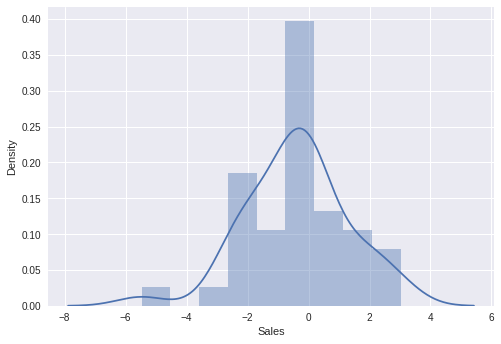

In [46]:
sns.distplot(y_test - predictions)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [48]:
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2748262109549338
MSE: 2.9077569102710896
RMSE: 1.7052146229349223
